# Import Packages 

In [1]:
# built-in packages
import itertools
from os import path

# third-party packages (install required)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from tqdm.notebook import tqdm

sns.set_style('ticks')

# Load Data

In [2]:
MODULOME_PATH = '../../data/k12_modulome'

In [3]:
logTPM_file = path.join(MODULOME_PATH,'log_tpm.csv') # Enter log-TPM filename here
all_metadata_file = path.join(MODULOME_PATH, 'metadata_qc_part1_all.tsv') # Enter full metadata filename here
metadata_file = path.join(MODULOME_PATH,'metadata_qc_part1_curated.tsv') # Enter curated metadata filename here

## Load Expression Data

In [4]:
DF_log_tpm = pd.read_csv(logTPM_file,index_col=0).fillna(0)
print('Number of genes:',DF_log_tpm.shape[0])
print('Number of samples:',DF_log_tpm.shape[1])
DF_log_tpm.head()

Number of genes: 4355
Number of samples: 3125


,DRX021104,DRX021105,DRX021106,DRX021107,DRX021108,DRX021109,DRX021110,DRX021111,DRX021112,DRX021113,...,SRX9847190,SRX9847191,SRX9847192,SRX9847193,SRX9847194,SRX9847195,SRX9847196,SRX9847197,SRX9847198,SRX9847199
Geneid,,,,,,,,,,,,,,,,,,,,,
b0001,7.029959,6.622736,7.432303,6.381883,6.804199,6.916179,7.397104,6.908232,7.054338,7.071349,...,8.566702,9.380866,8.252813,9.074773,9.486670,9.108823,11.594074,11.638712,10.342377,12.011251
b0002,5.747732,5.355841,5.600802,5.836251,5.934542,5.710201,6.076589,5.931383,6.106830,6.062702,...,8.689193,8.384986,8.246861,8.808543,7.313813,6.988476,8.701928,8.745391,8.872444,9.033943
b0003,6.980948,6.462644,6.892203,7.042173,7.114765,6.950374,7.165159,7.099663,7.171863,7.226719,...,8.565724,8.173506,8.079899,8.089667,7.033023,6.838851,8.487988,8.535580,8.929818,8.968621
b0004,7.082538,6.667796,6.953646,7.146234,7.194022,7.195211,7.450556,7.061534,7.336129,7.483060,...,8.545026,8.332171,8.191644,8.168586,7.443634,7.206327,8.363149,8.415361,8.998691,8.754739
b0005,4.434483,4.109176,4.475982,4.758536,4.735403,4.328734,4.469072,4.698514,4.938426,4.710403,...,4.935025,5.066220,4.852146,4.570050,4.726430,4.473129,4.875793,5.037875,5.401024,5.796026


## Load Metadata

In [5]:
DF_metadata = pd.read_csv(metadata_file,index_col=0,sep='\t')
print('Number of samples with curated metadata:',DF_metadata.shape[0])
DF_metadata.head()

Number of samples with curated metadata: 2312


,Run,ReleaseDate,LoadDate,spots,bases,spots_with_mates,avgLength,size_MB,AssemblyName,download_path,...,pH,project,reference_condition,species,species_tax_id,strain_description,strain_tax_id,supplement,temperature,time
DRX021104,DRR023050,8/8/21 13:10,8/8/21 13:09,15144738,3059237076,15144738,202,1823,NaN,https://sra-download.ncbi.nlm.nih.gov/traces/d...,...,7.0,mtase,empty_exp,NaN,NaN,MG1655 del_mrr del_hsdR del_hsdM del_hsdS del_...,NaN,NaN,37.0,NaN
DRX021105,DRR023051,8/8/21 13:10,8/8/21 13:11,14421218,2913086036,14421218,202,1725,NaN,https://sra-download.ncbi.nlm.nih.gov/traces/d...,...,7.0,mtase,empty_exp,NaN,NaN,MG1655 del_mrr del_hsdR del_hsdM del_hsdS del_...,NaN,NaN,37.0,NaN
DRX021106,DRR023052,8/8/21 13:10,8/8/21 13:12,8195758,1655543116,8195758,202,988,NaN,https://sra-download.ncbi.nlm.nih.gov/traces/d...,...,7.0,mtase,empty_exp,NaN,NaN,MG1655 del_mrr del_hsdR del_hsdM del_hsdS del_...,NaN,NaN,37.0,NaN
DRX021107,DRR023053,8/8/21 13:10,8/8/21 13:10,12529904,2531040608,12529904,202,1507,NaN,https://sra-download.ncbi.nlm.nih.gov/traces/d...,...,7.0,mtase,empty_exp,NaN,NaN,MG1655 del_mrr del_hsdR del_hsdM del_hsdS del_...,NaN,NaN,37.0,NaN
DRX021108,DRR023054,8/8/21 13:10,8/8/21 13:10,7137702,1441815804,7137702,202,855,NaN,https://sra-download.ncbi.nlm.nih.gov/traces/d...,...,7.0,mtase,empty_exp,NaN,NaN,MG1655 del_mrr del_hsdR del_hsdM del_hsdS del_...,NaN,NaN,37.0,NaN


In [6]:
DF_metadata_all = pd.read_csv(all_metadata_file,index_col=0,sep='\t')

## Remove Samples lacking Metadata

After curation, some samples either did not have enough replicates or metadata to warrant inclusion in this database.

In [7]:
DF_metadata_passed_step4 = DF_metadata[~DF_metadata['drop'].fillna(False)].copy()
print('New number of samples with curated metadata:',DF_metadata_passed_step4.shape[0])
DF_metadata_passed_step4.head()

New number of samples with curated metadata: 1816


,Run,ReleaseDate,LoadDate,spots,bases,spots_with_mates,avgLength,size_MB,AssemblyName,download_path,...,pH,project,reference_condition,species,species_tax_id,strain_description,strain_tax_id,supplement,temperature,time
DRX021104,DRR023050,8/8/21 13:10,8/8/21 13:09,15144738,3059237076,15144738,202,1823,NaN,https://sra-download.ncbi.nlm.nih.gov/traces/d...,...,7.0,mtase,empty_exp,NaN,NaN,MG1655 del_mrr del_hsdR del_hsdM del_hsdS del_...,NaN,NaN,37.0,NaN
DRX021105,DRR023051,8/8/21 13:10,8/8/21 13:11,14421218,2913086036,14421218,202,1725,NaN,https://sra-download.ncbi.nlm.nih.gov/traces/d...,...,7.0,mtase,empty_exp,NaN,NaN,MG1655 del_mrr del_hsdR del_hsdM del_hsdS del_...,NaN,NaN,37.0,NaN
DRX021106,DRR023052,8/8/21 13:10,8/8/21 13:12,8195758,1655543116,8195758,202,988,NaN,https://sra-download.ncbi.nlm.nih.gov/traces/d...,...,7.0,mtase,empty_exp,NaN,NaN,MG1655 del_mrr del_hsdR del_hsdM del_hsdS del_...,NaN,NaN,37.0,NaN
DRX021107,DRR023053,8/8/21 13:10,8/8/21 13:10,12529904,2531040608,12529904,202,1507,NaN,https://sra-download.ncbi.nlm.nih.gov/traces/d...,...,7.0,mtase,empty_exp,NaN,NaN,MG1655 del_mrr del_hsdR del_hsdM del_hsdS del_...,NaN,NaN,37.0,NaN
DRX021108,DRR023054,8/8/21 13:10,8/8/21 13:10,7137702,1441815804,7137702,202,855,NaN,https://sra-download.ncbi.nlm.nih.gov/traces/d...,...,7.0,mtase,empty_exp,NaN,NaN,MG1655 del_mrr del_hsdR del_hsdM del_hsdS del_...,NaN,NaN,37.0,NaN


# Check Manual Curation
Since manual curation is error-prone, we want to make sure that all samples have labels for their project and condition. In addition, there should only be one reference condition in each project, and it should be in the project itself.

Any samples that fail these checks will be printed below.

In [8]:
assert(DF_metadata_passed_step4.project.notnull().all())
assert(DF_metadata_passed_step4.condition.notnull().all())

for name,group in DF_metadata_passed_step4.groupby('project'):
    ref_cond = group.reference_condition.unique()
    
    # Ensure that there is only one reference condition per project
    if not len(ref_cond) == 1:
        print('Multiple reference conditions for:, name')
    
    # Ensure the reference condition is in fact in the project
    ref_cond = ref_cond[0]
    if not ref_cond in group.condition.tolist():
        print('Reference condition not in project:', name)

Next, make a new column called ``full_name`` that gives every experimental condition a unique, human-readable identifier.

In [9]:
DF_metadata_passed_step4['full_name'] = DF_metadata_passed_step4['project'].str.cat(DF_metadata_passed_step4['condition'],sep=':')

# Remove Samples lacking Replicates

First, find sample names that have at least two replicates.

In [10]:
counts = DF_metadata_passed_step4.full_name.value_counts()
keep_samples = counts[counts >= 2].index
print(keep_samples[:5])

Index(['rockhopper:wt_glyc', 'evo_acid_w:wt', 'rrna_stress:del_7prrn_BBB',
       't7_time:t7_5min', 'rockhopper:wt_glyc_aMG'],
      dtype='object')


Only keep these samples

In [11]:
DF_metadata_passed_step4 = DF_metadata_passed_step4[DF_metadata_passed_step4.full_name.isin(keep_samples)]
print('New number of samples with curated metadata:',DF_metadata_passed_step4.shape[0])
DF_metadata_passed_step4.head()

New number of samples with curated metadata: 1816


,Run,ReleaseDate,LoadDate,spots,bases,spots_with_mates,avgLength,size_MB,AssemblyName,download_path,...,pH,project,reference_condition,species,species_tax_id,strain_description,strain_tax_id,supplement,temperature,time
DRX021104,DRR023050,8/8/21 13:10,8/8/21 13:09,15144738,3059237076,15144738,202,1823,NaN,https://sra-download.ncbi.nlm.nih.gov/traces/d...,...,7.0,mtase,empty_exp,NaN,NaN,MG1655 del_mrr del_hsdR del_hsdM del_hsdS del_...,NaN,NaN,37.0,NaN
DRX021105,DRR023051,8/8/21 13:10,8/8/21 13:11,14421218,2913086036,14421218,202,1725,NaN,https://sra-download.ncbi.nlm.nih.gov/traces/d...,...,7.0,mtase,empty_exp,NaN,NaN,MG1655 del_mrr del_hsdR del_hsdM del_hsdS del_...,NaN,NaN,37.0,NaN
DRX021106,DRR023052,8/8/21 13:10,8/8/21 13:12,8195758,1655543116,8195758,202,988,NaN,https://sra-download.ncbi.nlm.nih.gov/traces/d...,...,7.0,mtase,empty_exp,NaN,NaN,MG1655 del_mrr del_hsdR del_hsdM del_hsdS del_...,NaN,NaN,37.0,NaN
DRX021107,DRR023053,8/8/21 13:10,8/8/21 13:10,12529904,2531040608,12529904,202,1507,NaN,https://sra-download.ncbi.nlm.nih.gov/traces/d...,...,7.0,mtase,empty_exp,NaN,NaN,MG1655 del_mrr del_hsdR del_hsdM del_hsdS del_...,NaN,NaN,37.0,NaN
DRX021108,DRR023054,8/8/21 13:10,8/8/21 13:10,7137702,1441815804,7137702,202,855,NaN,https://sra-download.ncbi.nlm.nih.gov/traces/d...,...,7.0,mtase,empty_exp,NaN,NaN,MG1655 del_mrr del_hsdR del_hsdM del_hsdS del_...,NaN,NaN,37.0,NaN


In [12]:
DF_metadata_all['passed_curation'] = DF_metadata_all.index.isin(DF_metadata_passed_step4.index)

# Replicate Correlations

In [13]:
DF_log_tpm = DF_log_tpm[DF_metadata_passed_step4.index]

## Compute Pearson R Correlations

Biological replicates should have a Pearson R correlation above 0.95. For samples with more than 2 replicates, the replicates must have R >= 0.95 with at least one other replicate or it will be dropped. The correlation threshold can be changed below:

In [14]:
rcutoff = 0.95

The following code computes correlations between all samples and collects correlations between replicates and non-replicates.

In [15]:
rep_corrs = {}
rand_corrs = {}

num_comparisons = len(DF_metadata_passed_step4)*(len(DF_metadata_passed_step4)-1)/2

for exp1,exp2 in tqdm(itertools.combinations(DF_metadata_passed_step4.index,2),total=num_comparisons):
    if DF_metadata_passed_step4.loc[exp1,'full_name'] == DF_metadata_passed_step4.loc[exp2,'full_name']:
        rep_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]
    else:
        rand_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]

  0%|          | 0/1648020.0 [00:00<?, ?it/s]

Correlations can be plotted on a histogram

Median Pearson R between replicates: 0.98


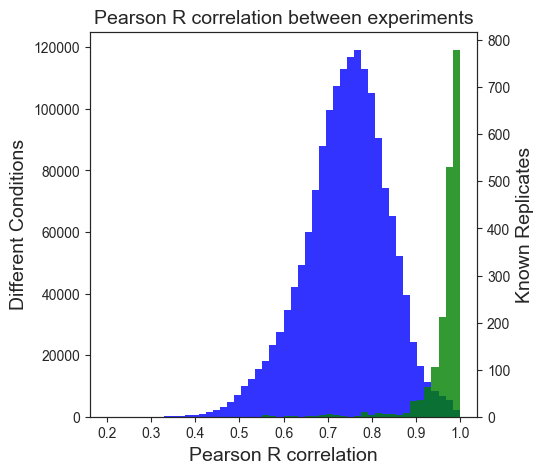

In [16]:
fig,ax = plt.subplots(figsize=(5,5))
ax2 = ax.twinx()
ax2.hist(rep_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='green',linewidth=0)
ax.hist(rand_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='blue',linewidth=0)
ax.set_title('Pearson R correlation between experiments',fontsize=14)
ax.set_xlabel('Pearson R correlation',fontsize=14)
ax.set_ylabel('Different Conditions',fontsize=14)
ax2.set_ylabel('Known Replicates',fontsize=14)

med_corr = np.median([v for k,v in rep_corrs.items()])
print('Median Pearson R between replicates: {:.2f}'.format(med_corr))

Remove samples without any high-correlation replicates

In [17]:
corr_thresh = 0.95
dissimilar = []
for full_cond_name, condition_df in DF_metadata_passed_step4.groupby('full_name'):
    rep_corrs_cond = {cond_tup: corr for cond_tup, corr in rep_corrs.items() if cond_tup[0] in condition_df.index or cond_tup[1] in condition_df.index}
    # if there's nothing, there weren't any replicates, this "passes"
    if condition_df.shape[0] == 1:
        continue
    # or if there's just 2, it's simple
    elif condition_df.shape[0] == 2:
        for (cond1, cond2), corr in rep_corrs_cond.items():
            if corr < corr_thresh:
                dissimilar.extend([cond1, cond2])
    # if there's 3 or more replicates, take the ones with the best correlation greedily
    elif condition_df.shape[0] > 2:
        # only need to worry about dissimilar if there's at least one below threshold
        sorted_rep_corrs = sorted(rep_corrs_cond.items(), key=lambda tup: tup[1], reverse=True)

        (top_cond1, top_cond2), top_corr = sorted_rep_corrs[0]
        to_keep = []
        if top_corr >= corr_thresh:
            to_keep = [top_cond1, top_cond2]
            for (cond1, cond2), corr in sorted_rep_corrs[1:]:
                if cond1 in (top_cond1, top_cond2) or cond2 in (top_cond1, top_cond2):
                    if corr >= corr_thresh:
                        to_keep.extend([cond1, cond2])
        dissimilar.extend(set(condition_df.index).difference(set(to_keep)))
        
dissimilar = set(dissimilar)

In [18]:
# Save this information in both the original metadata dataframe and the new metadata dataframe
DF_metadata_all['passed_replicate_correlations'] = ~DF_metadata_all.index.isin(dissimilar)
DF_metadata_passed_step4['passed_replicate_correlations'] = ~DF_metadata_passed_step4.index.isin(dissimilar)

In [19]:
DF_metadata_final = DF_metadata_passed_step4[DF_metadata_passed_step4['passed_replicate_correlations']]
print('# Samples that passed replicate correlations:',len(DF_metadata_final))

# Samples that passed replicate correlations: 1675


## Check for Reference Conditions
If a reference condition was removed due to poor replicate correlations, a new reference condition needs to be defined.

Again, any samples that fail these checks will be printed below.

In [20]:
project_exprs = []
for name,group in DF_metadata_final.groupby('project'):
    
    # Get reference condition
    ref_cond = group.reference_condition.iloc[0]
    
    # Ensure the reference condition is still in the project
    if ref_cond not in group.condition.tolist():
        print('Reference condition missing from:', name)
    
    # Check that each project has at least two conditions (a reference and at least one test condition)
    if len(group.condition.unique()) <= 1:
        print('Only one condition in:', name)

Only one condition in: camps
Only one condition in: hns_stpA
Only one condition in: mazF_OE
Only one condition in: pixR
Only one condition in: putida_silver
Only one condition in: sdsR_ryeA


If necessary, choose a new condition for failed projects and re-run notebook.

# Center Dataset to Reference Conditions

In [21]:
DF_log_tpm_final = DF_log_tpm[DF_metadata_final.index]

In [22]:
project_exprs = []
for name,group in DF_metadata_final.groupby('project'):
    
    # Get reference condition
    ref_cond = group.reference_condition.iloc[0]
    
    # Get reference condition sample ids
    ref_samples = group[group.condition == ref_cond].index
    
    # Get reference condition expression
    ref_expr = DF_log_tpm_final[ref_samples].mean(axis=1)
    
    # Subtract reference expression from project
    project_exprs.append(DF_log_tpm_final[group.index].sub(ref_expr,axis=0))

DF_log_tpm_norm = pd.concat(project_exprs,axis=1)

# Save Final Datasets

In [35]:
DF_log_tpm_final.to_csv(path.join(MODULOME_PATH,'log_tpm_qc.csv'))
DF_log_tpm_norm.to_csv(path.join(MODULOME_PATH,'log_tpm_norm.csv'))
DF_metadata_final.to_csv(path.join(MODULOME_PATH,'metadata_qc_part2.csv'))
DF_metadata_all.to_csv(path.join(MODULOME_PATH,'metadata_qc_part2_all.csv'))

# Append PRECISE-1K

In [23]:
P1K_PATH = '../../data/precise1k/'

In [24]:
p1k_metadata = pd.read_csv(path.join(P1K_PATH, 'metadata_qc.csv'), index_col=0)
p1k_log_tpm = pd.read_csv(path.join(P1K_PATH, 'log_tpm_qc.csv'), index_col=0)
p1k_log_tpm_norm = pd.read_csv(path.join(P1K_PATH, 'log_tpm_norm_qc.csv'), index_col=0)

## to Project-Centered Modulome

In [38]:
merged_log_tpm_norm = p1k_log_tpm_norm.merge(DF_log_tpm_norm, left_index=True, right_index=True, how='inner')

In [39]:
merged_log_tpm_norm.to_csv(path.join(MODULOME_PATH, 'log_tpm_norm_with_p1k.csv'))

## to PRECISE-1K-centered Modulome

In this case, we will use the NON-normalized version and normalize using PRECISE-1K's control condition

PCA plot of expression from modulome shows small enough batch effects for this

In [25]:
merged_log_tpm = p1k_log_tpm.merge(DF_log_tpm_final, left_index=True, right_index=True, how='inner')

In [26]:
# Define centering reference condition as "control" project, growth in M9 medium with glucose
reference = ['p1k_00001','p1k_00002']

# Subtract mean expression of reference from entire dataset
DF_log_tpm_norm_p1k_ctrl = merged_log_tpm.sub(merged_log_tpm[reference].mean(axis=1),axis=0)

In [42]:
DF_log_tpm_norm_p1k_ctrl.to_csv(path.join(MODULOME_PATH, 'log_tpm_norm_with_p1k_ctrl.csv'))